# 1 - Importing packages

In [51]:
import pandas as pd # to dataframes
import matplotlib.pyplot as plt #to define plot parameters
import seaborn as sns #to graphical plots
import numpy as np #to math

plt.style.use('ggplot') # to plot graphs with gggplot2 style

import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from wordcloud import WordCloud, STOPWORDS

from bokeh.io import output_file, output_notebook
from bokeh.plotting import figure, show
output_notebook()

Loading BokehJS ...

# 2 - Import Data Source

In [19]:
df=pd.read_csv('../CannaConnect/Dataset/cannabis.csv')
print(df.shape)
print(df.dtypes)
df.head()

(2351, 6)
Strain          object
Type            object
Rating         float64
Effects         object
Flavor          object
Description     object
dtype: object


,Strain,Type,Rating,Effects,Flavor,Description
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%..."


# 3 - Conducting some Basic Exploration Data Analysis (EDA)

In [20]:
# Are there any missing values?
print(df.isnull().sum())
# Drop all rows that are missing
df2=df.dropna()
# Counting the number of missing values in each column (again)
print(df2.isnull().sum())
# Examine the shape of the DataFrame
print('The shape of the DataFrame after removing null values is:', df2.shape)

Strain          0
Type            0
Rating          0
Effects         0
Flavor         46
Description    33
dtype: int64
Strain         0
Type           0
Rating         0
Effects        0
Flavor         0
Description    0
dtype: int64
The shape of the DataFrame after removing null values is: (2277, 6)


In [24]:
#Converting  Object type into string (necessary for future text processing)
#df2.Strain=df2.Strain.astype(str)
df2['Type'] = df2['Type'].astype(str)
#df2.Effects=df2.Effects.astype(str)
#df2.Flavor=df2.Flavor.astype(str)
#df2.Description=df2.Description.astype(str)

C:\Users\dastous\Anaconda3\envs\py3.6\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [25]:
# Counting how many unique values in each columns of the dataset:
print(df2.nunique())

Strain         2276
Type              3
Rating           25
Effects        1612
Flavor         1278
Description    2271
dtype: int64


# 4 - Conducting Some Visual (Graphical and numerical) Exploratory Data Analysis (EDA)

In [28]:
# Numerical Visualization of the Type of each Strains
print("Numerical distribution by Strains-Type")
print(df2.groupby("Type")["Strain"].count())
print("Percentage of distribution by Strains-Type ")
print((df2.groupby("Type")["Strain"].count() / len(df2.Type) * 100).round(decimals=2))

Numerical distribution by Strains-Type
Type
hybrid    1169
indica     680
sativa     428
Name: Strain, dtype: int64
Percentage of distribution by Strains-Type 
Type
hybrid    51.34
indica    29.86
sativa    18.80
Name: Strain, dtype: float64


In [29]:
# Graphical Visualization of categorical values (or factors)
Species = df2.Type.unique()
countpertype=(df2.groupby("Type")["Strain"].count()).values

# Set the x_range to the list of categories above
p = figure(x_range=Species, plot_height=250, title="Strains-Type Distribution",x_axis_label='Type', y_axis_label='Count per Strains-Type')

# Categorical values can also be used as coordinates
p.vbar(x=Species, top=countpertype, width=0.9)

# Set some properties to make the plot look better
p.xgrid.grid_line_color = None
p.y_range.start = 0

show(p)

In [39]:
#Graphical Visualization of the Strains-Rating distribution

uniquerating=df2.Rating.unique()
countperrating=df2.Rating.value_counts().values

# Set the x_range to the list of categories above
p = figure(x_range=(0,6), plot_height=250, title="Distribution of Strains-Rating",x_axis_label='Ratings', y_axis_label='Count per Rating')

# Categorical values can also be used as coordinates
p.vbar(x=uniquerating, top=countperrating, width=0.1)

# Set some properties to make the plot look better
p.xgrid.grid_line_color = None
p.y_range.start = 0

show(p)

In [32]:
# The Dataset contains multiple information in the column Effect and Flavor
# For future used, I will slip these column into multiples.

In [33]:
# There is an inventory of maximum 5 Effects per strains
df_effect = pd.DataFrame(df2.Effects.str.split(',',4).tolist(),
             columns = ['Effect_1','Effect_2','Effect_3','Effect_4','Effect_5'])

# There is an inventory of maximum 4 Flavors per strains
df_flavors = pd.DataFrame(df2.Flavor.str.split(',',n=3,expand=True).values.tolist(),
                          columns = ['Flavor_1','Flavor_2','Flavor_3','Flavor_4'])

In [34]:
#Concatenating the new variables with the dataframe
df2 = pd.concat([df2, df_effect], axis=1)
df2 = pd.concat([df2, df_flavors], axis=1)

#Looking the result
df2.head()

df2.columns

Index(['Strain', 'Type', 'Rating', 'Effects', 'Flavor', 'Description',
       'Effect_1', 'Effect_2', 'Effect_3', 'Effect_4', 'Effect_5', 'Flavor_1',
       'Flavor_2', 'Flavor_3', 'Flavor_4'],
      dtype='object')

In [42]:
# New Generated DataFrame 
df2.head()

,Strain,Type,Rating,Effects,Flavor,Description,Effect_1,Effect_2,Effect_3,Effect_4,Effect_5,Flavor_1,Flavor_2,Flavor_3,Flavor_4
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...,Creative,Energetic,Tingly,Euphoric,Relaxed,Earthy,Sweet,Citrus,None
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...,Relaxed,Aroused,Creative,Happy,Energetic,Flowery,Violet,Diesel,None
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...,Uplifted,Happy,Relaxed,Energetic,Creative,Spicy/Herbal,Sage,Woody,None
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...,Tingly,Creative,Hungry,Relaxed,Uplifted,Apricot,Citrus,Grapefruit,None
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%...",Happy,Relaxed,Euphoric,Uplifted,Talkative,Citrus,Earthy,Orange,None


In [18]:
# Exporting the New Generated DataFrame for future used
df2.to_excel('../Cannjoin/Dataset/EDA.xlsx')

In [38]:
# One example of Graphical Visualisation for the Effect 1 column
uniqueeffect=df2['Effect_1'].dropna().unique()
countpereffect=df2['Effect_1'].value_counts().values

# Set the x_range to the list of categories above
p = figure(x_range=uniqueeffect, plot_height=250, plot_width=750, title="Species Counts",x_axis_label='Species', y_axis_label='Count per species')

# Categorical values can also be used as coordinates
p.vbar(x=uniqueeffect, top=countpereffect, width=0.1)

# Set some properties to make the plot look better
p.xgrid.grid_line_color = None
p.y_range.start = 0

show(p)

The top 5 First Effects related
Relaxed     820
Happy       462
Euphoric    240
Uplifted    235
Sleepy       81
Name: Effect_1, dtype: int64


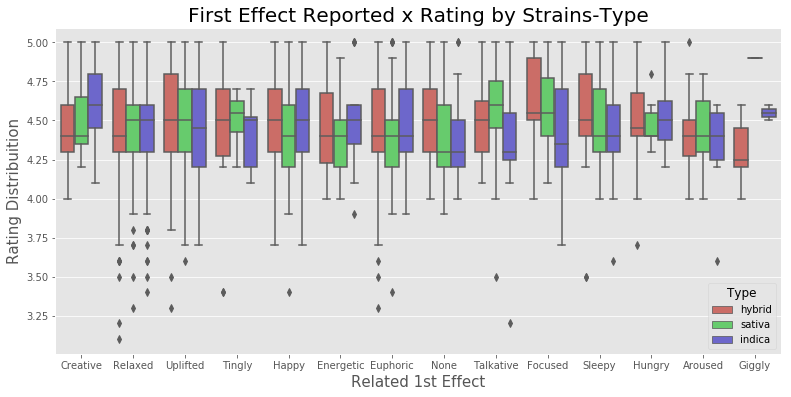

In [41]:
# Numerical and Graphical Visualisation: Distribution of the Impact of the 1st Effect on the Rating
print("The top 5 First Effects related")
print(df2['Effect_1'].value_counts()[:5])

plt.figure(figsize=(13,6))

g = sns.boxplot(x = 'Effect_1', y="Rating",
                hue="Type",
                data=df2[df2["Rating"] > 3],
                palette="hls")
g.set_xlabel("Related 1st Effect", fontsize=15)
g.set_ylabel("Rating Distribuition", fontsize=15)
g.set_title("First Effect Reported x Rating by Strains-Type",fontsize=20)

plt.show()

In [44]:
# Numerical print-out of the Effects proportion distribution
print(df2.Effect_1.value_counts(normalize = True).head())
#print(df2.Effect_2.value_counts(normalize = True).head())
#print(df2.Effect_3.value_counts(normalize = True).head())
print('Effect_1 has an inventory of :', df2.Effect_1.nunique(),'unique effect')
print('Effect_2 has an inventory of :', df2.Effect_2.nunique(),'unique effect')
print('Effect_3 has an inventory of :', df2.Effect_3.nunique(),'unique effect')
print('Effect_4 has an inventory of :', df2.Effect_4.nunique(),'unique effect')
print('Effect_5 has an inventory of :', df2.Effect_5.nunique(),'unique effect')

Relaxed     0.360123
Happy       0.202899
Euphoric    0.105402
Uplifted    0.103206
Sleepy      0.035573
Name: Effect_1, dtype: float64
Effect_1 has an inventory of : 15 unique effect
Effect_2 has an inventory of : 15 unique effect
Effect_3 has an inventory of : 14 unique effect
Effect_4 has an inventory of : 14 unique effect
Effect_5 has an inventory of : 14 unique effect


In [45]:
print(df2.Flavor_1.value_counts(normalize = True).head())
#print(df2.Flavor_2.value_counts(normalize = True).head())
#print(df2.Flavor_3.value_counts(normalize = True).head())
print('Flavor_1 has an inventory of :', df2.Flavor_1.nunique(),'unique flavor')
print('Flavor_2 has an inventory of :', df2.Flavor_2.nunique(),'unique flavor')
print('Flavor_3 has an inventory of :', df2.Flavor_3.nunique(),'unique flavor')
print('Flavor_4 has an inventory of :', df2.Flavor_4.nunique(),'unique flavor')

Earthy    0.231006
Sweet     0.180061
Citrus    0.080808
Berry     0.053140
None      0.048309
Name: Flavor_1, dtype: float64
Flavor_1 has an inventory of : 48 unique flavor
Flavor_2 has an inventory of : 48 unique flavor
Flavor_3 has an inventory of : 49 unique flavor
Flavor_4 has an inventory of : 17 unique flavor


# 5 - Conducting Some NLP Exploration Data Analysis

In [47]:
# Total Number of Words per Descripton
df_words = df2.Description.apply(lambda x: len(str(x).split(" ")))
print(df_words.head())
print(df_words.describe())

0    69
1    98
2    72
3    69
4    93
Name: Description, dtype: int64
count    2349.000000
mean       71.539804
std        27.416402
min         1.000000
25%        58.000000
50%        72.000000
75%        87.000000
max       329.000000
Name: Description, dtype: float64


In [48]:
#Total Number of Character per Description
df_character = df2.Description.str.len() ## this also includes spaces
print(df_character.head())
print(df_character.describe())

0    372.0
1    582.0
2    424.0
3    391.0
4    551.0
Name: Description, dtype: float64
count    2277.000000
mean      454.714097
std       146.626162
min         4.000000
25%       372.000000
50%       452.000000
75%       540.000000
max      1120.000000
Name: Description, dtype: float64


In [49]:
#Average Word Length
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))#
df_avg_word = df2.Description.astype(str).apply(lambda x: avg_word(x))
print(df_avg_word.head())
print(df_avg_word.describe())

0    4.405797
1    4.989691
2    4.902778
3    4.600000
4    4.924731
Name: Description, dtype: float64
count    2349.000000
mean        5.078731
std         0.507590
min         3.000000
25%         4.891892
50%         5.126582
75%         5.368421
max         6.500000
Name: Description, dtype: float64


In [52]:
#Number of stopwords in the Description
stopwords = set(STOPWORDS)
#stop = set(stopwords.words('english'))
df_stop_words = df2.Description.astype(str).apply(lambda x: len([x for x in x.split() if x in stopwords]))
print(df_stop_words.head())
print(df_stop_words.describe())

0    25
1    30
2    25
3    22
4    30
Name: Description, dtype: int64
count    2349.000000
mean       24.164325
std        10.283556
min         0.000000
25%        19.000000
50%        24.000000
75%        30.000000
max        83.000000
Name: Description, dtype: float64


In [53]:
# What are the 50 Most frequent words in the Description
all_words = df2.Description.str.split(expand=True).unstack().value_counts()
frequent_words = all_words.index.values[0:50]
print(frequent_words)

['and' 'a' 'the' 'of' 'is' 'to' 'with' 'strain' 'that' 'in' 'for' 'by'
 'this' 'its' 'an' 'effects' 'hybrid' 'This' 'The' 'from' 'as' 'OG'
 'cross' 'are' 'Kush' 'indica' 'aroma' 'has' 'it' 'on' 'sweet' 'sativa'
 'indica-dominant' 'buds' 'be' 'but' 'body' 'you' 'while' 'between' 'or'
 'Its' 'bred' 'sativa-dominant' 'will' 'potent' 'can' 'high' 'have' 'was']


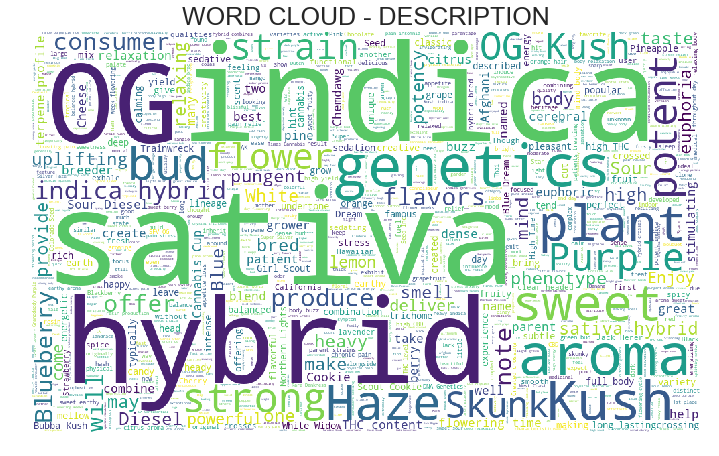

In [36]:
# Basic wordcloud of words found in the Description
stopwords = set(STOPWORDS)
newStopWords = ['strain','effect', 'genetic', 'effects','flavor','dominant','known','cross'] #from the list above, we are keeping words relevant to the analysis
stopwords.update(newStopWords)

wordcloud = WordCloud(background_color='white',
                      stopwords=stopwords,
                      max_words=1500,
                      max_font_size=200, 
                      width=1000, height=600,
                      random_state=42,
                      ).generate(" ".join(df2['Description'].astype(str)))

fig = plt.figure(figsize = (12,12))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DESCRIPTION", fontsize=25)
plt.axis('off')
plt.show()